In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import scipy
%matplotlib inline
import pandas as pd
import pystan

# Modellvergleich

- Fragestellung
- Hierarchisches Modell
    - Modellparameter $m$
- Vergleich zweier Modelle
- Bayes-Faktor
    - Theorie
    - mathematisch geschlossene Lösung
    - Gitter-Näherung
    - MCMC
- Ergebnis

# Fragestellung

Sie haben zwei Modelle zur Auswahl und Daten gemessen: welches Modell beschreibt die Daten besser?

#### Beispiel:

- Temperaturabhängigkeit des elektrischen Widerstands einer Kohleschicht
    - Linear?
    - Polynom?
    - Exponentiell?
- Lineares Modell 
    - mit oder ohne Gruppenunterteilung
- Münzprägeanstalten
    - Münze aus Prägeanstalt A oder B?
    - Modell-1: aus A oder Modell-2: aus B

## Hierarchisches Modell

- Daten $y$
- Parameter $\theta$
- Modellauswahl $m\qquad\qquad$ # jetzt neu und verbessert!

#### Likelihood

Wahrscheinlichkeit für das Auftreten der Daten
$$p_{m}(y|\theta_{m},m)$$

#### Prior innerhalb eines Modells

Wahrscheinlichkeit für das Auftreten der Parameter
$$p_{m}(\theta_{m}|m)$$

#### Prior zur Auswahl des Modells

$$p(m)$$

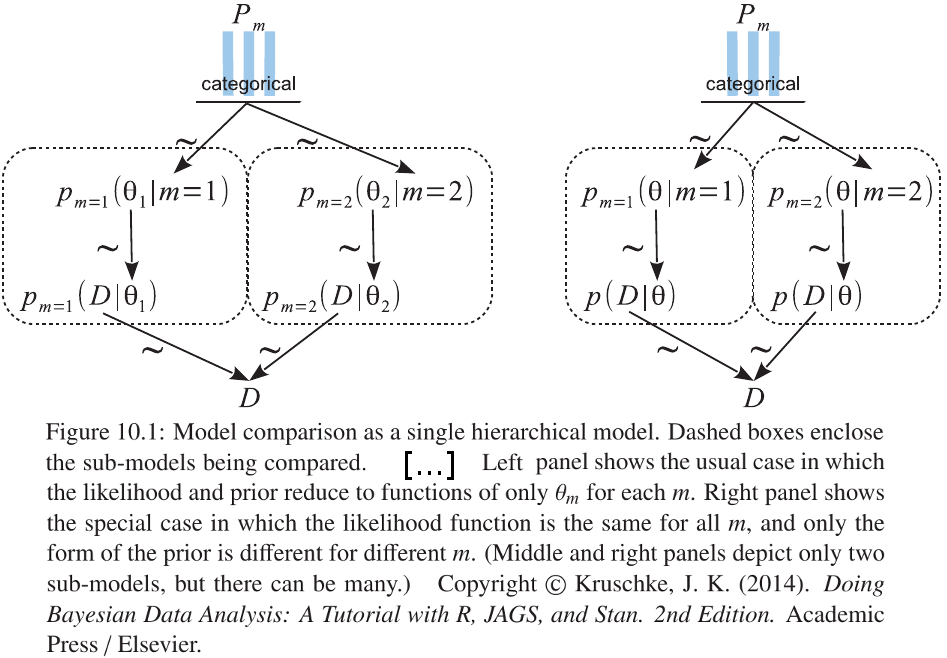

In [3]:
Image(filename='images/Kruschke2nd_Comparison_Fig10p1.png', width='60%')

### Bayes Regel

$$\begin{align}
p(\theta_1,\theta_2,\theta_3,\dots,m|D) &= \frac{
p(D|\theta_1,\theta_2,\theta_3,\dots,m)\,p(\theta_1,\theta_2,\theta_3,\dots,m)
}{
\sum_m \int p(D|\theta_1,\theta_2,\theta_3,\dots,m)\,p(\theta_1,\theta_2,\theta_3,\dots,m)\,\mathrm{d}\theta_1 \mathrm{d}\theta_2 \mathrm{d}\theta_3 \dots 
} \\ \\
 &= \frac{
\prod_m p(D|\theta_1,\theta_2,\theta_3,\dots,m)\,p_m(\theta_m|m)\,p(m)
}{
\sum_m \int \prod_m p(D|\theta_1,\theta_2,\theta_3,\dots,m)\,p_m(\theta_m|m)\,p(m)\,\mathrm{d}\theta_m
}
\end{align}$$

# Hierarchisches Modell

1. Modellauswahl $m$
2. Für jedes Modell Prior-Parameterverteilung
3. Für jedes Modell Prior-Datenverteilung 
4. Daten

### Modellauswahl $m$

Randverteilung (*Marginal*) von $m$ sagt etwas darüber aus, wie wahrscheinlich welches Modell ist.
- $m$ ist diskret
- $p(m)$ die Wahrscheinlichkeiten jeden Modells
$$p(m|D) = \frac{p(D|m)\,p(m)}{\sum_m p(D|m)\,p(m)}$$

#### Das ist gefragt.

> die likelihood

### Likelihood unter Modellauswahl $m$

marginalisiert über alle Parameter $\theta$
$$p(D|m) = \int p_m(D|\theta_m,m)\,p_m(\theta_m|m)\,\mathrm{d}\theta_m$$

- Diese Likelihood enthält den
    - **Prior** der **Parameter** innerhalb dieses Modells
    - **Likelihood** der Daten unter dem Modell
- ausintegriert (*marginalisiert*) als Randverteilung des ganzen Modells
- ... daher kann das gesamte Modell stark von den gewählten Priors der Modellparameter abhängen

> Verteilung des Parameter berücksichtigen.
$p_m(\theta_m|m)$

# Vergleich zweier Modelle

<br>
$$\frac{p(m\!=\!1|D)}{p(m\!=\!2|D)} = \frac{p(D|m\!=\!1)}{p(D|m\!=\!2)} \frac{p(m\!=\!1)}{p(m\!=\!2)} \frac{/\sum_m p(D|m)\,p(m)}{/\sum_m p(D|m)\,p(m)}$$

> Model 1. und Model 2, $likelihood \cdot prior / \sum{}$

- Kürzen
    - $\frac{\sum_m p(D|m)\,p(m)}{\sum_m p(D|m)\,p(m} = 1$

- Vorwissen Modell-Prior
    - $\frac{p(m\!=\!1)}{p(m\!=\!2)}$

- Bayes-Faktor
    - $BF := \frac{p(D|m\!=\!1)}{p(D|m\!=\!2)}$

> Wie zu nachhier Vorwissen abhangig

# Bayes-Faktor (*BF*)

$$BF := \frac{p(D|m\!=\!1)}{p(D|m\!=\!2)}$$

- verschiebt die a-priori Wahrscheinlichkeit für die Modelle $\frac{p(m=1)}{p(m=2)}$ 
- durch Vergleich der *Modell-Likelihoods*

#### Daumenregel zur Auswertung

$BF>3$ bzw. $BF<\frac{1}{3}$ gelten nach Harold Jeffreys als "substantiell":

| BF                  | Strength of evidence    |
| ------------------- | ----------------------- |
| $<10^0$             | negative                |
| $10^0$-$10^{1/2}$   | barely worth mentioning |
| $10^{1/2}$-$10^{1}$ | substantial             |
| $10^1$-$10^{3/2}$   | strong                  |
| $10^{3/2}$-$10^{2}$ | very strong             |
| $>10^2$             | decisive                |

#### Literatur

- H. Jeffreys: The Theory of Probability (3 ed.). Oxford. p. 432 (1961)

# Beispiel: (stellvertretend) Münzen aus zwei Prägeanstalten

- Modell-1: Münzen aus Anstalt #1 haben $\omega_1=0.25$
- Modell-2: Münzen aus Anstalt #2 haben $\omega_2=0.75$

#### Frage

Woher stammt eine vorliegende Münze?

#### Daten

Nach $N=9$ Würfen kommt $z=6\times$ Kopf.

#### Prior

- $\omega_m$ siehe oben
- $\kappa=12$ 

gleichbedeutend mit
- $\theta_1 ~\sim \mathrm{beta}(3.5, \,8.5)\;$ und $\;\theta_2 ~\sim \mathrm{beta}(8.5, \,3.5)$

# Lösung 1: *formal*

Mathematisch geschlossen lösbar (siehe "*conjugate priors*" in VL. Bayes-II-BernoulliExakt)

- mit Beta-Funktion $\mathrm{B}$ (nicht beta-Verteilung $\mathrm{beta}$)

$$p(D|m) = p(z,N) = \frac{\mathrm{B}(z+a, N-z+b)}{\mathrm{B}(a,b)}\quad\mathrm{(*)}$$

- Bayes-Faktor
$$BF = \frac{0.000499}{0.002339} = 0.213 < \frac{1}{3}$$

Unter der Annahme des Unwissens $p(m\!\!=\!\!1) = p(m\!\!=\!\!2) = \frac{1}{2}$ ergibt sich daraus

$$ BF = \frac{p(m\!\!=\!\!1|D)}{p(m\!\!=\!\!2|D)} = \frac{p(m\!\!=\!\!1|D)}{1-p(m\!\!=\!\!1|D)} \quad \Rightarrow \quad  p(m\!\!=\!\!1|D) = 0.176 \,,\quad p(m\!\!=\!\!2|D) = 0.824$$

#### Ergebnis:

Die Münze kommt wahrscheinlich aus der Anstalt #2, beschrieben durch Modell #2

#### Posterior?

... haben wir damit noch nicht

> ?? $$ BF = \frac{p(m\!\!=\!\!1|D)}{p(m\!\!=\!\!2|D)} = \frac{p(m\!\!=\!\!1|D)}{1-p(m\!\!=\!\!1|D)} \quad \Rightarrow \quad  p(m\!\!=\!\!1|D) = 0.176 \,,\quad p(m\!\!=\!\!2|D) = 0.824$$

### Beweis für (*) in Übungsstunde

- beta-*Verteilung*: $beta(\theta|a,b) = \theta^{a-1}(1-\theta)^{b-1}\big{/}B(a,b)$
    - mit normierender Beta-*Funktion* $B(a,b)$
- Posterior: $\;p(\theta|z,N) = \theta^{z}(1-\theta)^{N-z} \cdot beta(\theta|a,b)\Big{/} p(z,N)$
    - (Definition) $\;\;\;\quad = \theta^{z+a-1}(1-\theta)^{N-z+b-1}\big{/}B(a,b) p(z,N)$ 
    - (Normierung) $\quad = \theta^{z+a-1}(1-\theta)^{N-z+b-1}\big{/}B(z+a,N-z+b)$
- Also 
$$p(z,N) = B(z+a,N-z+b)\big{/}B(a,b)$$

In [3]:
'''calculate Bayes factor for two models:
same distribution, different parameters theta=(.25, .75)'''
def convertbetaok(omega, kappa):              
    '''transforms (omega,kappa) to (a,b) for use in beta-function'''
    return (omega*(kappa-2)+1, (1-omega)*(kappa-2)+1)
# data: z heads among N tosses
z, N = (6, 9)
# parameter (omega, kappa) for the two models / mints
params = [(.25, 12.), (.75, 12.)]
pDm = [0., 0.]                             # place holder for results p(D|m=i)
for i, (omega, kappa) in enumerate(params):# for each mint:
    a, b = convertbetaok(omega , kappa)    #  parameter transformation
    #  Beta function (not distribution) "data & prior"
    numerator = scipy.special.beta(a+z,b+N-z)
    denominator = scipy.special.beta(a,b)  #  -"- "prior only"
    pDm[i] = n/d                           #  p(D|m=i)
print('p(D|m=1)/p(D|m=2) = {:.6f}/{:.6f} = BF = {:.4f}'.format(
                                        pDm[0], pDm[1], pDm[0]/pDm[1] ))

p(D|m=1)/p(D|m=2) = 0.000499/0.002339 = BF = 0.2135


### Ergebnis Lösung 1

Der Bayes-Faktor 
$$BF = \frac{p(D|m\!=\!1)}{p(D|m\!=\!2)}$$

   - kann direkt (über konjugierte Funktionen) mathematisch geschlossen gelöst werden (mit *beta-Funktion* B)

$$p(D|m) = p(z,N) = \frac{\mathrm{B}(z+a, N-z+b)}{\mathrm{B}(a,b)}$$

- erspart das Integral
$$p(D|m) = \int p_m(D|\theta_m,m)\,p_m(\theta_m|m)\,\mathrm{d}\theta_m$$

- sagt nichts über die Posterior-Verteilung für $\theta$ aus
   - $\theta$ wurde marginalisiert

# Lösung 2: *vollständige Gitter-Näherung*

- $\omega$ kann auch als kontinuierlicher Parameter angesehen werden
    - erlaubt sind beide Werte der Prägeanstalten $[\omega_1, \omega_2]$

#### Prior

- Randverteilung "*marginal*" über $\omega$ hat zwei Spitzen 
    - bei den beiden möglichen Werten
- Randverteilung "*marginal*" über $\theta$ hat zwei Höcker 
    - um die beiden möglichen Werte $\omega_i$
- Verbundwahrscheinlichkeit aus 1:1 Modell-Prior

#### Likelihood

- Daten **nur** in direkter Abhängigkeit von $\theta$
- nicht direkt abhängig vom Modell mit Modell-Parameter $\omega$

> geht nicht aus

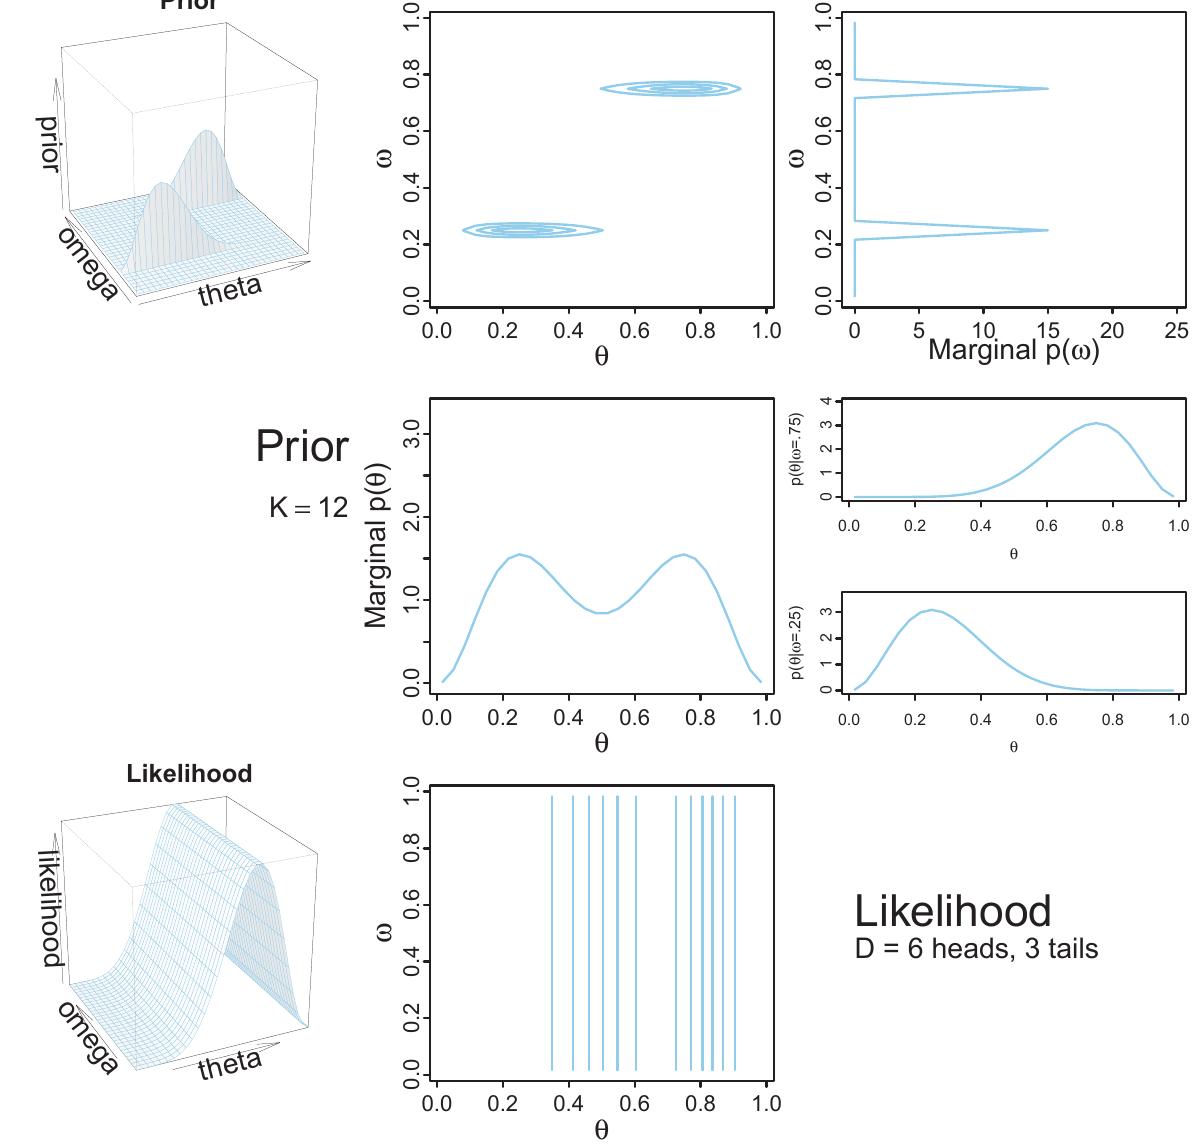

In [4]:
Image(filename='images/Kruschke2nd_Comparison_Fig10p3_oben.png', width='50%')

#### Posterior

- verschiebt Gewichte des Modellparameters $\omega$
   - Verhältnis der Höhe = *Bayes-Faktor*
- Je nach Modell Verteilung der Parameter $\theta$
- Insgesamt deren Randverteilung
   - wenn nur nach $\theta$ gefragt ist, unabhängig vom Modell(!)

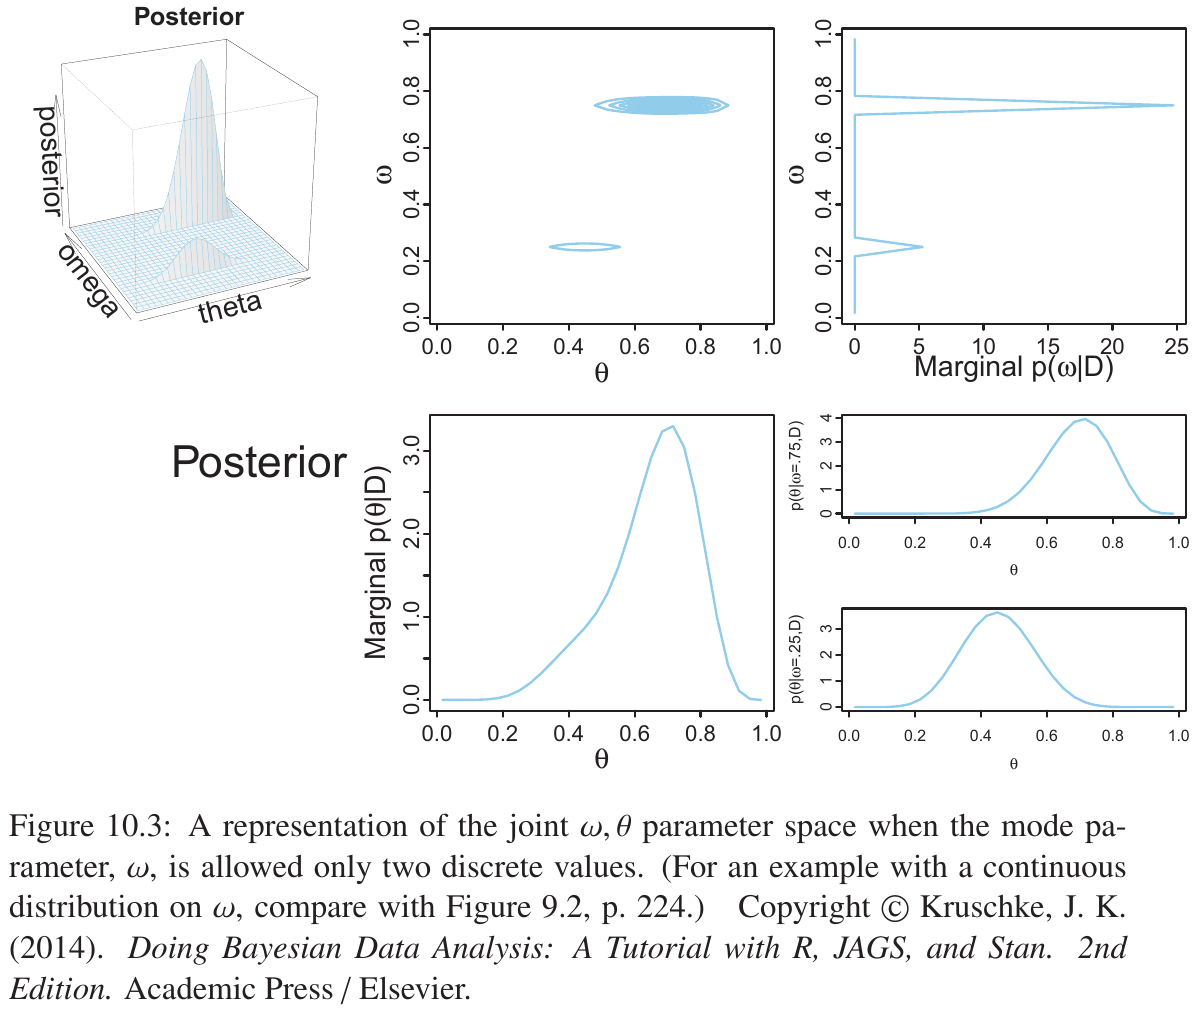

In [5]:
Image(filename='images/Kruschke2nd_Comparison_Fig10p3_unten.png', width='50%')

# Lösung 3: *MCMC*

#### a) MCMC auf die beiden einzelnen Modelle
#### b) MCMC auf das hierarchische Gesamtmodell

# Lösung 3a) diskrete MCMCs

#### Schritt 1: Integral = gewichteter Durchschnitt

$$\int f(\theta)p(\theta)\,\mathrm{d}\theta \approx \frac{1}{N}\sum_{\theta_i \sim p(\theta)}f(\theta_i)$$
weil Häufigkeit $\sim$ Dichte

> Je grosser N ist, desto naher zu sich selbst.

#### Schritt 2: Modell-*Likelihood*

$$\begin{align}
p(D) &= \int p(D|\theta)p(\theta)\,\mathrm{d}\theta \\
 &\approx \frac{1}{N}\sum_{\theta_i \sim p(\theta)}p(D|\theta_i)
\end{align}$$

Also Werte aus dem *Prior* ziehen und die Wahrscheinlichkeiten aufsummieren.

#### Lösung

- Dafür wäre eine Markov-Kette gut: Stichprobe aus **Prior**-Verteilung
- Likelihood berechnen
- aufsummieren

#### Problem

- Wahrscheinlichkeiten sind meist sehr klein
- Genauigkeit der Computer beim Aufsummieren nicht ausreichend

> Problem umgehen

#### Mathematischer Trick

Satz von Bayes
$$p(\theta|D) = \frac{p(D|\theta)\,p(\theta)}{p(D)}$$

Daraus
$$\frac{1}{p(D)} = \frac{p(\theta|D)}{p(D|\theta)\,p(\theta)}$$

Mit einer (vorerst) beliebigen, normierten Wahrscheinlichkeitsdichteverteilung $h(\theta)$ ergibt sich

$$\frac{1}{p(D)} = \frac{p(\theta|D)}{p(D|\theta)\,p(\theta)}\int h(\theta)\,\mathrm{d}\theta$$

Weil die *evidence* $p(D)$ nicht von $\theta$ abhängt(!) und damit 1.) eine Konstante ist, 2.) der Bruch für alle $\theta$ gilt:

$$\frac{1}{p(D)} = \int \frac{h(\theta)}{p(D|\theta)\,p(\theta)} p(\theta|D)\,\mathrm{d}\theta$$

Damit näherungsweise

$$\frac{1}{p(D)} \approx \frac{1}{N} \sum_{\theta_i \sim p(\theta|D)} \frac{h(\theta_i)}{p(D|\theta_i)\,p(\theta_i)}$$

#### Trick II

Wähle $h$ so, daß es der zu erwartenden *Posterior*-Verteilung entspricht

### Zusammenfassung

- wähle Vergleichsverteilung $h$ so ähnlich wie möglich zur erwarteten *posterior*-Verteilung
    - zB. aus Trainings-Datensatz
- Verwende die Posterior-Markov-Kette
- Löse obige Summe und invertiere
- $\Rightarrow$ *Likelihood* für das Modell $p(D|m)$
- Weiter für Posterior $p(\theta)$ wie bisher: MCMC darauf anwenden

In [9]:
'''calculate marginal likelihood p(D) of model 1 (omega=.25) '''

model1 = '''
    data {
      int<lower=0> Ntotal;               // number of tosses
      int<lower=0,upper=1> y[Ntotal];    // heads=1 or tails
    }
    parameters {
      real<lower=0, upper=1> theta;
    }
    transformed parameters {
      real omega;
      omega = 0.25;                      // model #1
    }
    model {
      theta ~ beta( omega*(12-2)+1, (1-omega)*(12-2)+1 );
      y ~ bernoulli( theta );
    }
        '''
y = np.array([0, 1, 1, 0, 1, 1, 1, 0, 1])  # data: 6 heads, 3 tails
data = {'y': y, 'Ntotal': len(y)}          # ... serves as dict for stan
# A) get MCMC posterior
fit1 = pystan.stan(model_code=model1, data=data, model_name='model1',
                   iter=1000, warmup=200, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL model1_5e2ad11a66cbcde47882260c1f91baab NOW.


In [10]:
print(fit1)

Inference for Stan model: model1_5e2ad11a66cbcde47882260c1f91baab.
4 chains, each with iter=1000; warmup=200; thin=1; 
post-warmup draws per chain=800, total post-warmup draws=3200.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.45  3.2e-3   0.11   0.24   0.37   0.45   0.52   0.66   1111    1.0
omega   0.25     0.0    0.0   0.25   0.25   0.25   0.25   0.25   3200    nan
lp__   -8.23    0.02   0.74 -10.29  -8.39  -7.95  -7.76  -7.71   1201    1.0

Samples were drawn using NUTS at Sat Jun 23 11:43:54 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [11]:
'''calculate marginal likelihood p(D) of model 1 - with
helper-function h and posterior mc'''
z, N = y.sum(), len(y)           # the data: 6 out of 9
omega, kappa = (0.25, 12)        # parameters for prior of mint_1 
def convertbetams(mean, std):
    '''convert (mean, std) of a beta distribution to its parameters (a, b)'''
    return (mean*(mean*(1-mean)/std**2-1), (1-mean)*(mean*(1-mean)/std**2-1))
# B) adapt a similar function h(theta)
                                # the resulting posterior chain
theta1 = np.asarray(fit1.extract('theta')['theta'])
                                # estimates for comparable h(theta)
tmean, tstd = (theta1.mean(), theta1.std())
print('Model-1:\n mean of thetas = {:.3f} with std of {:.3f}'
                            .format(tmean, tstd))
ah, bh = convertbetams(tmean, tstd)# convert parameters (see above) of h(theta)
h = stats.beta(ah, bh)              # define posterior-like function h
# C) approximate integral
# convert parameters (see above) of model prior
aprio, bprio = convertbetaok(omega, kappa)
oneoverpd = (h.pdf(theta1) / # calculate adapted integral approximation
            (theta1**(z)*(1-theta1)**(N-z)
             * stats.beta(aprio, bprio).pdf(theta1))).mean()
PD1 = 1 / oneoverpd
print(' p(D|m=1) = {:.6f}'.format(PD1))

Model-1:
 mean of thetas = 0.447 with std of 0.107
 p(D|m=1) = 0.000498


#### Teil-Ergebnis

Modell #1 mit $\omega_1=0.25$

- Die Likelihood für 6xKopf in 9 Würfen beträgt 0.0005
- entspricht sehr gut theoretisch berechnetem Wert von 0.000499

In [13]:
'''calculate marginal likelihood p(D) of model 2 (omega=.75)'''
model2 = '''
    data {
      int<lower=0> Ntotal;               // number of tosses
      int<lower=0,upper=1> y[Ntotal];    // heads=1 or tails
    }
    parameters {
      real<lower=0, upper=1> theta;
    }
    transformed parameters {
      real omega;
      omega = 0.75;                      // model #2
    }
    model {
      theta ~ beta( omega*(12-2)+1, (1-omega)*(12-2)+1 );
      y ~ bernoulli( theta );
    }
        '''
# same y = np.array([0, 1, 1, 0, 1, 1, 1, 0, 1])    # data: 6 heads, 3 tails
# same data = {'y': y, 'Ntotal': len(y)}       # ... serves as dict for stan
fit2 = pystan.stan(model_code=model2, data=data, model_name='model2',
                   iter=1000, warmup=200, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL model2_37f7eb068003691a608a9f6fcb3cc576 NOW.


In [14]:
print(fit2)

Inference for Stan model: model2_37f7eb068003691a608a9f6fcb3cc576.
4 chains, each with iter=1000; warmup=200; thin=1; 
post-warmup draws per chain=800, total post-warmup draws=3200.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.69  2.9e-3    0.1   0.48   0.62   0.69   0.76   0.86   1152    1.0
omega   0.75     0.0    0.0   0.75   0.75   0.75   0.75   0.75   3200    nan
lp__   -6.74    0.02   0.72  -8.75  -6.89  -6.48  -6.29  -6.24   1337    1.0

Samples were drawn using NUTS at Sat Jun 23 11:45:49 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [15]:
'''calculate marginal likelihood p(D)
of model 2 - with helper-function h and posterior mc'''
# same data    z, N
omega, kappa = (0.75, 12) # parameters for prior of mint_2 
# the resultingg posterior chain
theta2 = np.asarray(fit2.extract('theta')['theta'])
# estimates for comparable h(theta)
tmean, tstd = (theta2.mean(), theta2.std())
print('Model-2:\n mean of thetas = {:.3f} with std of {:.3f}'
                              .format(tmean, tstd))
# convert parameters (see above) of model prior
aprio, bprio = convertbetaok(omega, kappa)
# convert parameters (see above) of h(theta)
ah, bh = convertbetams(tmean, tstd)
# calculate adapted integral approximation
oneoverpd = (stats.beta(ah, bh).pdf(theta2) /
            (theta2**(z)*(1-theta2)**(N-z)
             * stats.beta(aprio, bprio).pdf(theta2) )).mean()
PD2 = 1 / oneoverpd
print(' p(D|m=2) = {:.6f}'.format(PD2))

Model-2:
 mean of thetas = 0.686 with std of 0.097
 p(D|m=2) = 0.002333


#### Teil-Ergebnis
Modell #2 mit $\omega_2=0.75$
- Die Likelihood für 6xKopf in 9 Würfen beträgt 0.0023
- entspricht sehr gut theoretisch berechnetem Wert von 0.002339

In [16]:
'''compare models 1 and 2 by Bayes factor'''
BF = PD1/PD2
print('The Bayes factor is BF = {:.3f}'.format(BF))
pm1 = BF/(1+BF)
print('Posterior model credibility for\n model-1: {:.1f}%\n model-2: {:.1f}%'
              .format(100*pm1, 100-100*pm1))

The Bayes factor is BF = 0.213
Posterior model credibility for
 model-1: 17.6%
 model-2: 82.4%


## Ergebnis MCMC Modellvergleich

Die Likelihood für Versuchsergebnis-Daten $z=6\times\;$ Kopf in $N=9$ Würfen beträgt (wie theoretisch berechnet) 

- für Modell-1 ($\theta_1=0.25$): $\quad p(D|m\!=\!1)=0.000499$
- für Modell-2 ($\theta_2=0.75$): $\quad p(D|m\!=\!2)=0.002338$

Daraus errechnet sich der **Bayes-Faktor** zu

- $BF = \frac{0.000499}{0.002338} = 0.213$ zu gunsten von Modell-2

womit sich die *posterior* Wahrscheinlichkeit der Modelle (nach *prior* 50%-50%) ergibt zu

- Modell-1: 17%
- Modell-2: 83%

# Ergebnis Modellvergleich

#### Welches von alternativen Modellen ist besser an die Daten angepaßt?

- Hierarchisches Modell
    - mit Modellauswahl als oberste Hierarchie
- Bayes Faktor erlaubt Vergleich
    - mathematisch geschlossene Lösung
    - Gitter-Näherung (unmöglich, wenn komplex)
    - MCMC der einzelnen Modelle
        - mit Anpassungs-Trick
- Daumenregel: Als "substantiell" gelten Bayes-Faktoren
    - $BF>3$ bzw. 
    - $BF<\frac{1}{3}$ 

----

# Lösung 3b) ein gesamtes Hierarchisches Modell

zu vergleichende Modelle als oberste Hierarchie einbauen in ein  

- Gesamt-Modell
    - Prior für Modellauswahl-Parameter $m$
    - Prior für Parameterverteilungen $\omega$ je Modell
    - Prior für Datenverteilung $\theta$ je Modell
    - Berechne gesamtes Modell
    - Werte Parameter $m$ aus
- Prior-Abhängigkeit
    - uninformativer Prior für die Modelle
    - Lernen durch Anpassung an Teil der Daten
    - Auswerten mit Rest der Daten

# ABER

Keine *int*  Parameter in *Stan*

> The root cause is that Stan doesn't allow assignment of real values to integers. In retrospect, we probably wouldn't have included round() at all as it introduces discontinuities, and thus defeats differentiability, which is the basis of our HMC and optimization and approximate inference algorithms.

Bob Carpenter answered Mar 11 2016 at 17:57 in [stackoverflow](http://stackoverflow.com/questions/35928204/stan-error-casting-parameter-to-int)

----



# Vorhersage treffen

## bei alternativen Modellen

#### A) bestes Modell

- das beste Modell suchen
- dessen Vorhersagen bestimmen

#### B) alle Modelle

- alle Modelle gleichberechtigt
- gewichten gemäß Wahrscheinlichkeit / Modell-Posterior
- Vorhersagen mitteln

> miteingehen. gleich berechnet hat. gewichten Mittel 

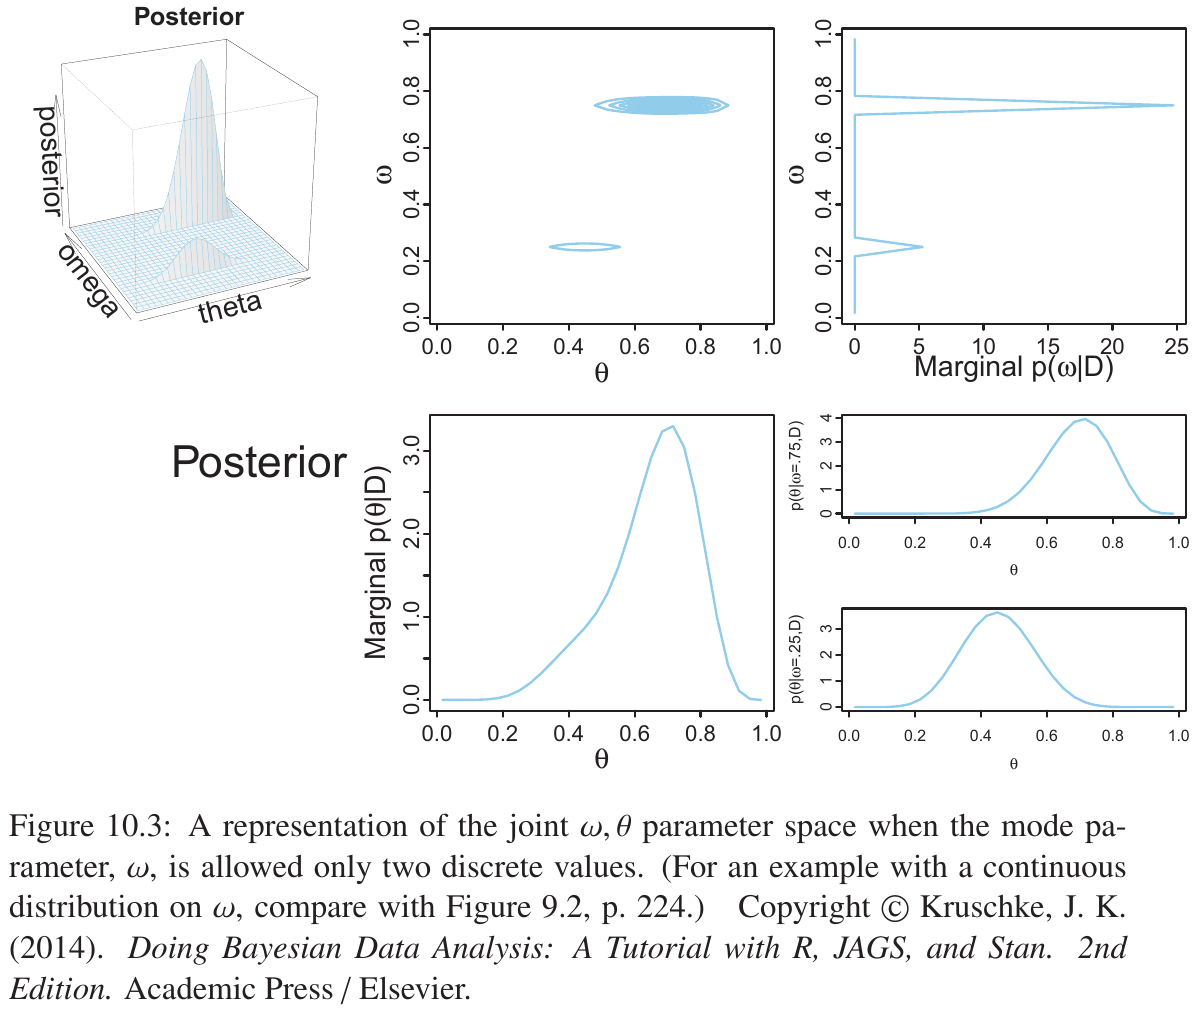

In [5]:
Image(filename='images/Kruschke2nd_Comparison_Fig10p3_unten.png', width='50%')

----



# Komplexität

Zwei Prägeanstalten: A produziert faire Münzen, B alle möglichen **[ÜA]**
    
- **Versuch**: eine Münze wählen und werfen
    - $N=20$

- **Ergebnis 1)**
    - $z_1 = 11$
    - Berechnet man m, so ist $m_A \gg m_B$

- **Ergebnis 2)**
    - $z_2=15$
    - Berechnet man m, so ist $m_A \ll m_B$

### Warum?
... wo doch 50%50 bei *beiden* Prägeanstalten möglich ist?

### Ergebnis
B zahlt den Preis der höheren Komplexität durch weit verstreute Priors

Gute Vergleiche mit ähnlich-informierten Priors für alternative Modelle

> Prior anhnlich soll
> das legt unterschidliche Wahrschlichkeit

----

# Abhängigkeit vom Prior

## a) Modellvergleich

### Posterior Parameter je nach Parameter-Prior
Drei Prägeanstalten: A produziert faire, B allerhand und C allerhand jedoch vermehrt extrem unfaire Münzen

- "Fairer" Prior für A
$$\theta_A \sim \mathbf{beta}(500, 500)$$

- "Allerhand" Priors für B und C
$$\theta_B \sim \mathbf{beta}(1,1) \qquad\qquad \theta_C \sim \mathbf{beta}(0.01,0.01)$$

### Versuchsergebnis
$$z=65 \; \text{ von } \; N=100$$

> Je gross ist, desto spitzer ist die Verteilung

### Auswertung
- Posterior
$$\theta_B \sim \mathbf{beta}(66,36)\qquad\qquad \theta_C \sim \mathbf{beta}(65.01,35.01)$$

- 95%-HDI:
$$[0.554, \;0.738] \qquad\qquad [0.556, \;0.742]\qquad$$

$\Rightarrow$ Sehr ähnlich

## Posterior Modell je nach Parameter-Prior
<br>
$$\mathrm{BF}_{AB} = 5.728 \qquad\qquad \mathrm{BF}_{AC} = 0.125 \qquad $$

$\Rightarrow$ Kontrovers!

**[ÜA]**

> mit flach und spitzer vergleichen, ist die Ergebnis ganz anders miteinander

## Ausweg

Generiere einen *Zwischen*-Prior mit einem Teil der Daten. Gleiches Beispiel wie gerade:

#### Versuchsergebnis

$$z=65 \; \text{ von } \; N=100$$

#### Erster Teil der Daten

$$z=6 \; \text{ von } \; N=10$$

#### Prior

$$\theta'_B \sim \mathbf{beta}(7,5)\qquad\qquad \theta'_C \sim \mathbf{beta}(6.01,4.01)$$

#### Zweiter Teil der Daten

$$z=59 \; \text{ von } \; N=90$$

### Ergebnis

$$\mathrm{BF}_{AB'} = 0.0557 \qquad\qquad \mathrm{BF}_{AC'} = 0.0575 \qquad $$

$\Rightarrow$ plausibel

> Basisfaktor 
abzwarkel irgende

## b) Hypothesentest

### Faire Münze?

Eine Münze wird als fair angenommen. 

#### Versuch
In 7 von 24 Würfen erscheint Kopf.

### Auswertung NHST
- Nullhypothese $\theta=0.5$
- Verwerfungsbereich
- p-Wert = $0.032 > \frac{0.05}{2}$

#### Ergebnis
- Nullhypothese "fair" kann nicht verworfen werden
- $\Rightarrow$ Münze kann fair sein.

### Auswertung Bayes-Statistik
- Prior: $beta(11, 11)$
- Likelihood
- Posterior
- 95%-HDI **[ÜA]** 

#### Ergebnis
- Das 95%-HDI für $\theta$ ist [0.25, 0.53]
- $\Rightarrow$ Münze kann fair sein.

### Fairer Nagel?

Ein Nagel wird *nicht* als fair angenommen.

#### Versuch
In 7 von 24 Würfen landet der Nagel auf dem Kopf.

### Auswertung NHST
?

### Auswertung Bayes-Statistik
- Prior: $beta(2, 22)$
- Likelihood
- Posterior
- 95%-HDI **[ÜA]** 

#### Ergebnis
- Das 95%-HDI für $\theta$ ist [0.09, 0.31]
- $\Rightarrow$ Nagel ist ***nicht*** fair.

## Nutzen von Priors
- Gleiches Versuchsergebnis
- Unterschiedliches Vorwissen
- $\Rightarrow$ Prior *erlaubt* unterschiedliche Betrachtungsweise

# Zusammenfassung
- Mischung von Modellen
    - universellerer Posterior zur Vorhersage
- Komplexität
    - wird berücksichtigt durch weit verteilte Priors
    - Modellvergleich gut nur bei ähnlich-informativen Priors
- Prior-Abhängigkeit
    - entschärfen durch Anlernen mit Teil-Daten
    - sinnvoll!

# Bemerkungen
- Beta-Verteilung ist ***nicht*** immer passend bei Bernoulli-Experimenten
    - aber lehrreich, da Vergleich Geschlossene Lösung/Gitter/MCMC möglich

# Fragen?

----